In [1]:
import numpy as np
import matplotlib.pyplot as plt

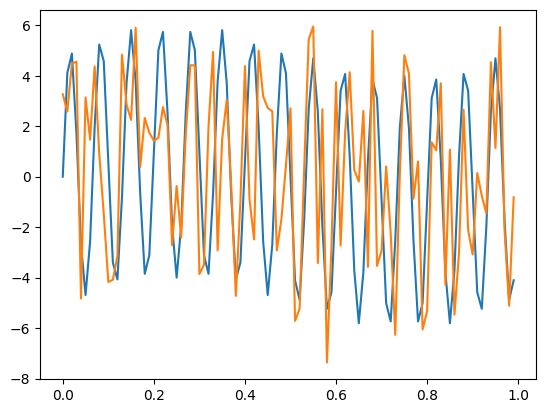

In [2]:
sr=100
ts=1/sr
t=np.arange(0,1,ts)
x=np.sin(2*np.pi*t)+2*np.sin(30*np.pi*t)+10*(np.random.rand(len(t)) - 0.5)

plt.plot(t, np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t)) #sin ruido
plt.plot(t,x) #con ruido

In [3]:
def DFT(x):
  N=len(x)
  X=[]
  for k in range(N):
    X_k=0
    for n in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      X_k+=x[n]/e
    X.append(X_k)
  return np.array(X)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


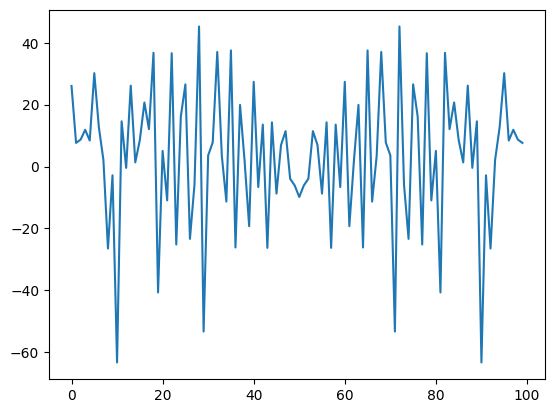

In [4]:
#Esta mal
k=np.arange(0, 100, 1)
plt.plot(k, DFT(x))

In [5]:
def IDFT(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      x_n+=X[k]*e
    x.append(x_n/100)
  return np.array(x)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


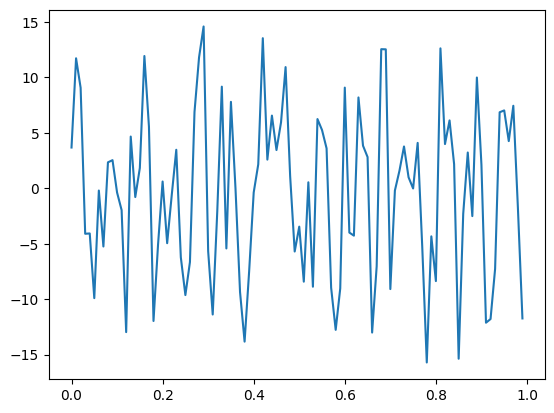

In [ ]:
#ESTA MAL
X=DFT(x)
V=IDFT(X)
plt.plot(t, V)


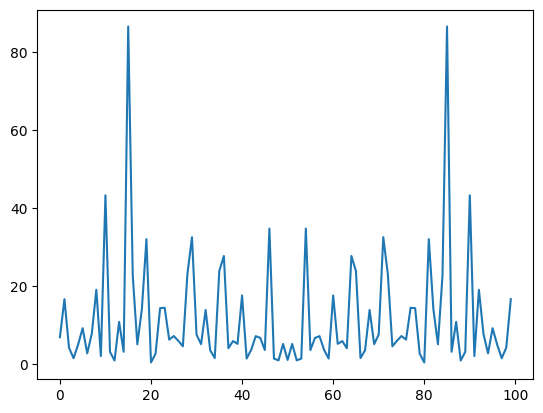

In [6]:
#DESTACO LO QUE CREEMOS QUE NO ES RUIDO
PS=DFT(x)*np.conj(DFT(x))/len(DFT(x))
plt.plot(k, PS)

In [7]:
#sin ruido (fuerza bruta)
def IcDFT(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      if 650>(X[k]*np.conj(X[k]))*N**(-1)>50 or (2.5 >= k >=0):
        x_n+=X[k]*e
      else:
        x_n+=0
    x.append(x_n/100)
  return np.array(x)


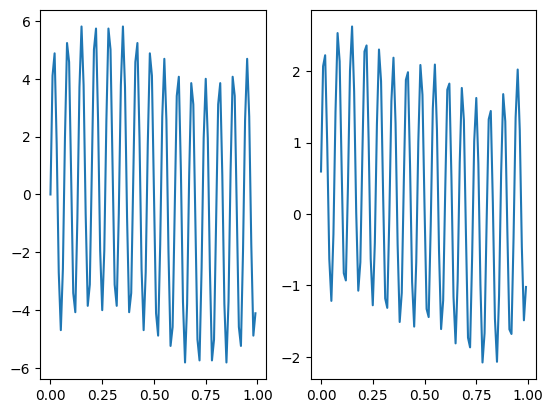

In [8]:
#el ruido me levanta todo
X=DFT(x)
V=IcDFT(X)
plt.subplot(1,2,1)
plt.plot(t, np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t))
plt.subplot(1,2,2)
plt.plot(t, V)